## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [23]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [24]:
hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****
## Preliminary analysis

In [25]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/Users/Thakur/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/Thakur/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


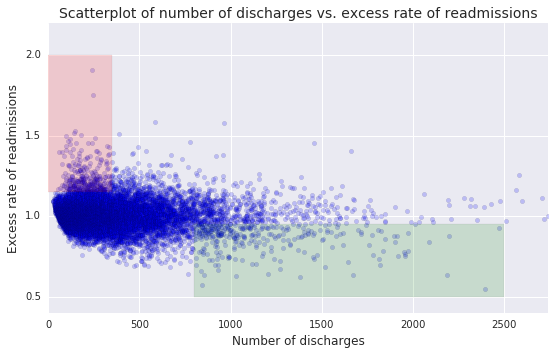

In [26]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [27]:
import seaborn as sns
import numpy as np
import scipy
import math
%matplotlib inline

In [28]:
df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0].dropna(subset=['Excess Readmission Ratio'])

Do You agree with the above analysis and recommendations ? Why or Why not ?

A. Initial Observation based on the plot above

/Users/Thakur/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


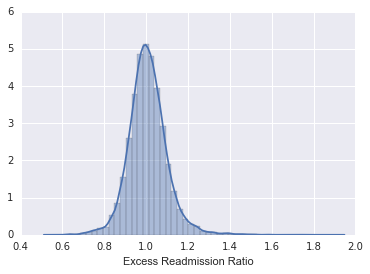

In [29]:
sns.distplot(df['Excess Readmission Ratio'].dropna())

In contrast, the excess readmission ratio is normally distributed as a result of the CLT.

Overall, rate of readmissions is trending down with increasing number of discharges

/Users/Thakur/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


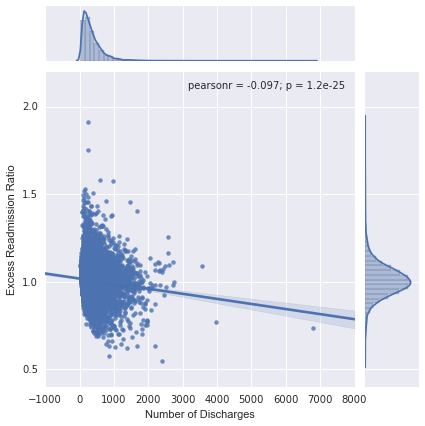

In [30]:
sns.jointplot(data=df, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg')

Conclusion:
The near zero PearsonR Score indicates that there is no correlation between the Excess Readmission Ratio and Number of Discharges. The apparent correlation might be a result of the skew in the number of discharges.
2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
Let us first look at how the Number of Discharge varies in the dataset

/Users/Thakur/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


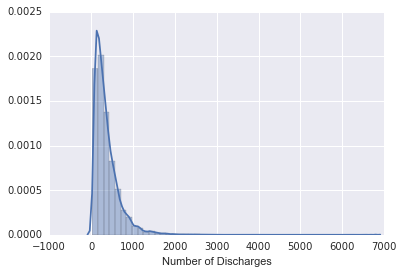

In [31]:
mean_discharge = df['Number of Discharges'].mean()
sns.distplot(df['Number of Discharges'])

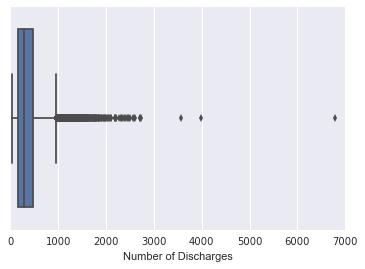

In [32]:
sns.boxplot(df['Number of Discharges'])

In [33]:
desc = scipy.stats.describe(df['Number of Discharges'])
print (desc)

DescribeResult(nobs=11497, minmax=(25, 6793), mean=365.46620857615028, variance=95329.39693128322, skewness=3.0725239010098413, kurtosis=25.676790101960464)


In [35]:
std = math.sqrt(desc[3])
mean = desc[2]
print ('Mean: {}, Standard Deviation: {}'.format(mean, std))

Mean: 365.4662085761503, Standard Deviation: 308.75459013799815


In [36]:
df_ = df[(df['Number of Discharges'] <= mean + (2 * std)) & (df['Number of Discharges'] >= mean - (2 * std))]

/Users/Thakur/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


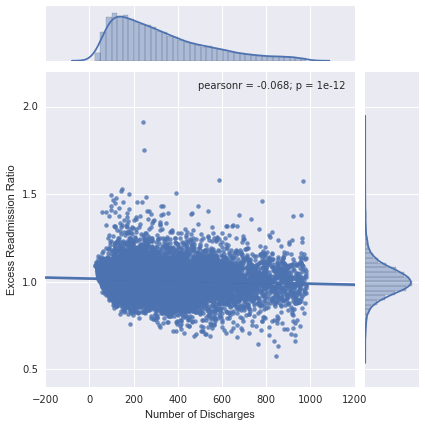

In [40]:
sns.jointplot(data=df_, x='Number of Discharges', y='Excess Readmission Ratio', kind='reg')

Firstly the distribution of the Number of Discharges has a clear skew - is not normally distributed. The dataset has a mean of 365 and a huge variance of 95329. The observed trend might simply be a result of the lack of data points on the observations with higher number of discharges. Our 95% confidence interval also shows that there is no significat observable trend between number of discharges and readmissions
B. Statistics
In hospitals/facilities with # of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
In hospitals/facilities with # of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

B. Statistics

In hospitals/facilities with # of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
In hospitals/facilities with # of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [41]:
def compute_lt_statistic(split_at):
    discharge_lt = df[df['Number of Discharges'] < split_at]['Excess Readmission Ratio']
    mean_discharge_lt = discharge_lt.mean()
    percent_discharge_lt = len(discharge_lt[discharge_lt > 1])/float(len(discharge_lt))
    return mean_discharge_lt, percent_discharge_lt, len(discharge_lt)

def compute_gt_statistic(split_at):
    discharge_gt = df[df['Number of Discharges'] > split_at]['Excess Readmission Ratio']
    mean_discharge_gt = discharge_gt.mean()
    percent_discharge_gt = len(discharge_gt[discharge_gt> 1])/float(len(discharge_gt))
    return mean_discharge_gt, percent_discharge_gt, len(discharge_gt)

In [44]:
split_at = 100
print ('Splits at {}:'.format(split_at))
print ('LT: {}'.format(compute_lt_statistic(split_at)))
print ('GT: {}'.format(compute_gt_statistic(split_at)))
print

split_at = mean
print ('Splits at Mean {}:'.format(split_at))
print ('LT: {}'.format(compute_lt_statistic(split_at)))
print ('GT: {}'.format(compute_gt_statistic(split_at)))
print

split_at = np.median(df['Number of Discharges'])
print ('Splits at Mode {}:'.format(split_at))
print ('LT: {}'.format(compute_lt_statistic(split_at)))
print ('GT: {}'.format(compute_gt_statistic(split_at)))

Splits at 100:
LT: (1.0226183501683506, 0.6321548821548821, 1188)
GT: (1.0057676562195774, 0.5035039906560249, 10274)
Splits at Mean 365.4662085761503:
LT: (1.0130625825082493, 0.5316281628162817, 7272)
GT: (0.9979360710059201, 0.4906508875739645, 4225)
Splits at Mode 282.0:
LT: (1.0145051670146121, 0.5382741823242867, 5748)
GT: (1.0003550959860374, 0.49476439790575916, 5730)


We can see that the split at 100 discharges is unfair since there are an order of magnitude more data points in the > 100 group. A more fair split would be to split at the mean/median. Such splits do not give any evidence that there is a significant difference in the readmission rates between lower and higher number of discharges groups.


C. Conclusions
There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
We have just seen that there is nearly zero correlation between number of discharges and readmission rates. Any apparenet correlation is a result of the skew in our underlying dataset.
Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
This is purely conjecture. Firstly, it is based on the unproven assumption that smaller hospitals have higher readmissions than larger hospitals. Secondly, there could be a whole host of reasons why this might be true including geographical, demographic, natural disasters and other factors not related to the quality of care.

D. Regulatory policy recommendations

Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

In [46]:
split_at = 300
print ('Splits at {}:'.format(split_at))
print ('LT: {}'.format(compute_lt_statistic(split_at)))
print ('GT: {}'.format(compute_gt_statistic(split_at)))
diff_read = compute_lt_statistic(split_at)[1] - compute_gt_statistic(split_at)[1]
print ('Difference in Readmission Rates: {}'.format(abs(diff_read)))

Splits at 300:
LT: (1.0142382121807445, 0.5374918140144074, 6108)
GT: (0.9997810438024227, 0.492264678471575, 5365)
Difference in Readmission Rates: 0.045227135542832364


The choice of small capacity to be < 300 seems completely arbitrary. Also, we see that the difference in readmission ratio between hospitals lesser than and greater than 300 admissions is only 0.045, which we will later prove is statistically insignificant. Therefore, there is no reason for small capacity hospitals

Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Once again, there is no evidence to support this claim. Our correlation is flawed and by extension, this recommendation is unfounded.


Provide support for your arguments and your own recommendations with a statistically sound analysis:

Let us look at the difference in readmission ratios between small (< 300) and large capacity hospitals.

H0: There is a difference in readmission ratios between small (< 300) and large capacity hospitals
H1: There is NO difference in readmission ratios between small (>= 300) and large capacity hospitals

Test Statistic: Mean of Difference in Readmission Ratios CI: 95%

In [49]:
df_small = df[df['Number of Discharges'] < 300]
df_large = df[df['Number of Discharges'] >= 300]
print (len(df_small), len(df_large))
df_small_mean = df_small['Excess Readmission Ratio'].mean()
df_large_mean = df_large['Excess Readmission Ratio'].mean()
diff_mean = abs(df_small_mean - df_large_mean)
print ('Difference in Mean between small and large hospitals: {}'.format(diff_mean))

6108 5389
Difference in Mean between small and large hospitals: 0.014367364156993245


Let us now find the proability of getting a similar difference of means from our population, ignoring hospotal size

In [56]:
def run_simulation(data, iters=10000):
    size = int(len(data)/2.0)
    res = []
    for i in range(iters):
        dat = data.values
        np.random.shuffle(dat)
        splits = dat[:size], dat[size:]
        res.append(abs(splits[0].mean() - splits[1].mean()))
    return res

iterations = 10000
sample_means = run_simulation(df['Excess Readmission Ratio'], iterations)

In [54]:
p_val = sum([1 for x in sample_means if x >= diff_mean])/float(iterations)
print (p_val)

0.0


/Users/Thakur/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


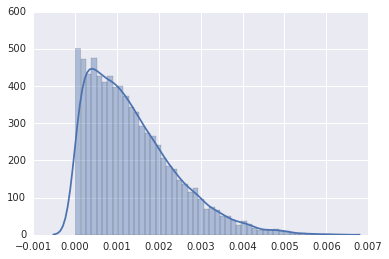

In [57]:
sns.distplot(sample_means)

In [59]:

mean_stats = scipy.stats.describe(sample_means)
mean, std = mean_stats[2], math.sqrt(mean_stats[3])
ci = scipy.stats.norm.interval(0.95, loc=mean, scale=std)
print ('95% Confidence Interval: {}'.format(ci))
print ('Mean: {}, Standard Error: {}'.format(mean, std))
print ('Does the Observed Mean Difference lie inside the Confidence Interval'.format(ci[0] <= diff_mean <= ci[1]))

95% Confidence Interval: (-0.00067952231309042046, 0.003389101828386597)
Mean: 0.0013547897576480883, Standard Error: 0.0010379333940750458
Does the Observed Mean Difference lie inside the Confidence Interval


The P-value of 0 implies that there is a 0% chance that we see a larger difference in means on random draws from the sample. Also, we see that the observed difference in mean lies well within the 95% confidence interval of our experiment.
P-Value: 0.3135 (31.35%)
Standard Error: 0.00103797392191
95% Confidence Interval: (-0.00065654605825103663, 0.0034122369494138591)
    
Conclusion: Reject H0. There is NO difference in readmission ratios between small (>= 300) and large capacity hospitals.